# Objetivo del notebook

El notebook actual tiene como objetivo principal, llevar a cabo el analisis y visualizacion de caracteristicas del conjunto de datos utilizado para este proyecto.

En esencia, el conjunto de datos a utilizar se encuentra publicado en OpenML, bajo el nombre de "*adult*" (tambien conocido como "**Census Income**"), y se trata de un dataset bastante famoso.

*Dentro del proyecto se incluyen algunos **documentos adiciones** en los que poder obtener mas informacion acerca de este valioso dataset.*



## Analisis del dataset

La descripcion del conjunto de datos "Census Income" se puede encontrar dentro del fichero README.md que se incluye con el propio proyecto.

Dentro de este fichero, se incluye informacion como: 

* Origen del dataset, documentación, enlaces y referencias.

* Informacion acerca del tamaño y características registradas.
* Descripcion del estado actual del dataset.
* Licencia del mismo.
* Analisis subjetivo del valor del dataset para desarrollar un modelo de prediccion ¿Se tienen suficientes datos para nuestro caso de uso, según las características necesarias? ¿Qué nº de características nos podemos permitir con este nº de datos?

In [1]:
!pip install seaborn --upgrade
!pip install matplotlib==3.7.3  # Para ver correctamente los coeficientes de correlacion en el heatmap, debo instalar esta version de Matplotlib.

# Importar las librerias a utilizar

En las siguientes celdas, se importan todas las librerias externas y metodos especificos que son utilizados a lo largo del notebook. 

In [2]:
# Librerias y metodos para analisis y manipulacion de datos
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml 

# Librerias para la visualizacion de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Otras librerias 
import os

En la plataforma de OpenML, aparece como ultima version publicada para este conjunto de datos la version 4. 

Cargare el dataset correspondiente a esta version para el desarrollo del proyecto.

![Imagen del dataset publicado en OpenML](../src/data/images/openml_dataset.png)

# Análisis del conjunto de datos

In [3]:
# Cargo en memoria el dataset a utilizar
adult_df__ = fetch_openml('adult', version = 4)

# Defino una variable que apunte al propio objeto DataFrame de la instancia definida
adult_df = adult_df__.frame

# Muestro los primeros 5 registros del dataset
adult_df.head()

C:\Users\David\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
0,19,134974.0,10,0.0,0.0,20,nan,Some-college,Never-married,nan,Own-child,White,Female,United-States,<=50K
1,41,195096.0,13,0.0,0.0,50,Self-emp-inc,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
2,31,152109.0,9,0.0,0.0,50,Private,HS-grad,Never-married,Exec-managerial,Not-in-family,White,Male,United-States,<=50K
3,40,202872.0,12,0.0,0.0,45,Private,Assoc-acdm,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50K
4,35,98989.0,5,0.0,0.0,38,nan,9th,Divorced,nan,Own-child,Amer-Indian-Eskimo,Male,United-States,<=50K


In [5]:
adult_df['relationship'].unique()

['Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried', 'Wife']
Categories (6, object): ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']

In [4]:
# Muestro los 5 registros finales del dataset
adult_df.tail()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
48837,49,120629.0,13,27828.0,0.0,60,Private,Bachelors,Divorced,Exec-managerial,Not-in-family,Black,Female,United-States,>50K
48838,32,206609.0,13,0.0,0.0,60,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
48839,42,204235.0,10,0.0,0.0,40,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K
48840,75,113868.0,16,0.0,0.0,20,State-gov,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Black,Male,United-States,>50K
48841,64,186376.0,13,5178.0,0.0,40,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,>50K


In [5]:
# Ejecuto el metodo .info() para informarme acerca del contenido del dataset
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   fnlwgt          48842 non-null  float64 
 2   education-num   48842 non-null  int64   
 3   capital-gain    48842 non-null  float64 
 4   capital-loss    48842 non-null  float64 
 5   hours-per-week  48842 non-null  int64   
 6   workclass       48842 non-null  category
 7   education       48842 non-null  category
 8   marital-status  48842 non-null  category
 9   occupation      48842 non-null  category
 10  relationship    48842 non-null  category
 11  race            48842 non-null  category
 12  sex             48842 non-null  category
 13  native-country  48842 non-null  category
 14  class           48842 non-null  object  
dtypes: category(8), float64(3), int64(3), object(1)
memory usage: 3.0+ MB


Con la informacion que nos proporciona esta instruccion, podemos ver que el conjunto de datos que vamos a utilizar, no contiene valores nulos.

Ademas, entre otra informacion que nos proporciona esta instruccion, podemos encontrar:

**Numero de registros**. El dataset cuenta con 48842 registros.

**Numero de caracteristicas**. Contamos con 15 columnas en el dataset (14 variables potencialmente predictoras; 1 variable objetivo).

**Tipos de datos**. El dataset cuenta con 9 variables (siendo una de ellas, la variable objetivo) que deberemos procesar antes de alimentar al modelo. El resto de variables almacena valores de tipo numerico, que igualmente, deberemos procesar y normalizar, a fin de tener un dataset mucho mas uniforme.

In [6]:
# Genero un dataframe descriptivo con .describe()
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Este dataframe nos proporciona informacion muy util sobre el dataset, parte de la cual explico a continuacion:

* El dataframe solo incluye informacion acerca de las varaibles numericas. Este dataframe trata de mostrar informacion estadistica acerca del contenido global de los registros de cada variable, por lo que caracteristicas con informacion categorica nominal quedan excluidas de este.

* Como digo, obtenemos informacion estadistica que nos proporciona bastante valor acerca de las variables numericas. En este caso, el dataset nos facilita la media, desviacion tipica, y los valores correspondientes a los registros que coinciden con todos los cuartiles, en un supuesto caso de representar el dataset en un Boxplot, o grafico de cajas y bigotes.

* Como parte de los extremos del grafico Boxplot mencionado, el dataframe anterior nos indica el valor minimo y maximo registrado para cada una de las caracteristicas numericas para las que se tiene informacion.

In [7]:
# En este notebook voy a guardar todas las imagenes que muestre, por lo que defino una constante con la ruta base del directorio de imagenes del
# desarrollo.

IMAGE_PATH = '../src/visualization/'

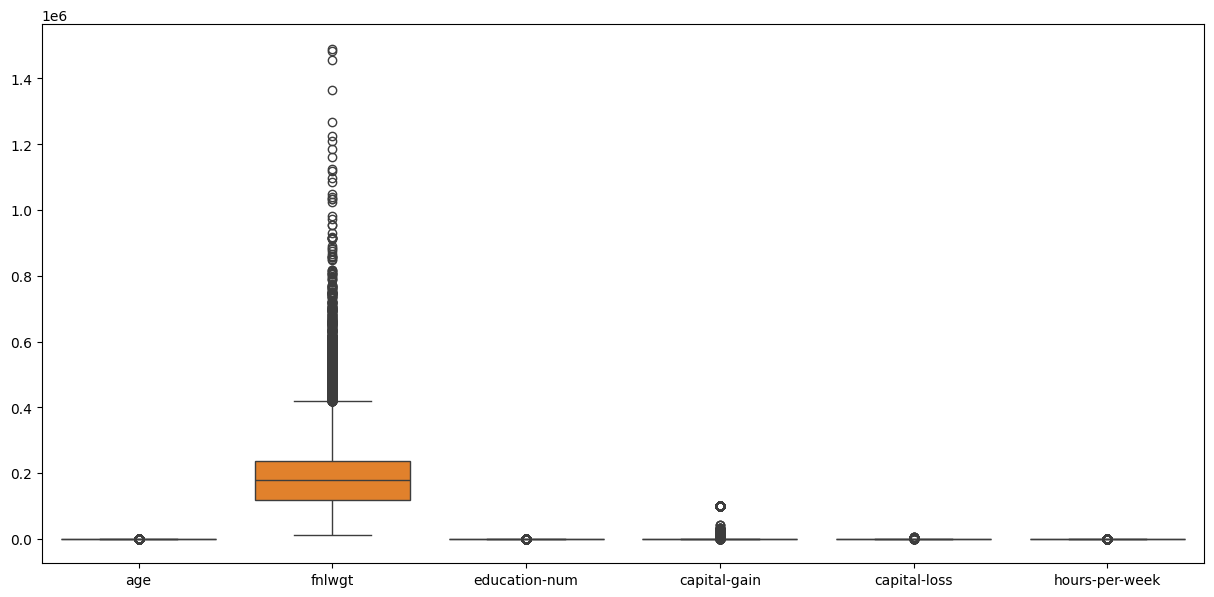

In [8]:
## Boxplot del dataframe generado con ".describe()"

## Habia tratado de representar los graficos con la libreria Plotly, la cual me gusta mucho, y es bastante interactiva con el usuario. No obstante, al cabo de unos cuantos graficos,
## ralentizaba el notebook (se representa cada punto considerado como outlier para cada uno de los graficos). Es por esto que he utilizado Seaborn finalmente.

# Defino una lista con las caracteristicas que almacenan valores de tipo numerico
plt.figure(figsize = (15, 7))
boxplot_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
sns.boxplot(data = adult_df[boxplot_columns])
plt.savefig(os.path.join(IMAGE_PATH, 'boxplots/general_boxplot.png'))
plt.show()

El boxplot anterior no nos muestra de una manera apropiada los Boxplot de las caracteristicas, debido a la dispersion que existe entre los valores registrados en estas columnas, y aquellos contenidos en la variable "fnlwgt" (los registros de esta categoria alcanzan valores correspondientes +- a 1.5 millones!).

Para poder visualizarlos de forma correcta, voy a representar un grafico Botplot especifico para cada una de estas caracteristicas.

### Boxplot variable 'age'

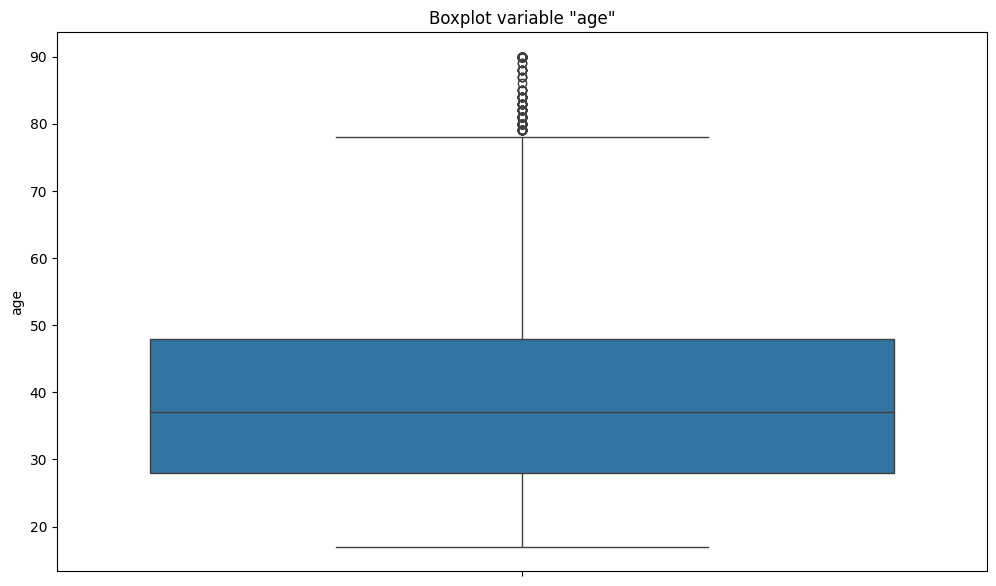

##################################################
ESTADISTICAS DEL BOXPLOT


Media: 38.6
Mediana: 37.0
Desviacion tipica: 13.7

Primer cuartil: 28.0
Segundo cuartil: 37.0
Tercer cuartil: 48.0
Cuarto cuartil: 90.0

Minimo registrado: 17
Maximo registrado: 90

##################################################


In [9]:
plt.figure(figsize = (12, 7))
sns.boxplot(adult_df['age'])

plt.title('Boxplot variable "age"')
plt.savefig(os.path.join(IMAGE_PATH, 'boxplots/age_boxplot.png'))
plt.show()

print("#"*50)
print('ESTADISTICAS DEL BOXPLOT')
print()
print()
print('Media:', round(adult_df['age'].mean(), 1))
print('Mediana:', round(adult_df['age'].median(), 1))
print('Desviacion tipica:', round(adult_df['age'].std(), 1))
print()
print('Primer cuartil:', adult_df['age'].quantile(0.25))
print('Segundo cuartil:', adult_df['age'].quantile(0.50))
print('Tercer cuartil:', adult_df['age'].quantile(0.75))
print('Cuarto cuartil:', adult_df['age'].quantile(1.))
print()
print('Minimo registrado:', adult_df['age'].min())
print('Maximo registrado:', adult_df['age'].max())
print()
print("#"*50)

### Boxplot variable 'fnlwgt'

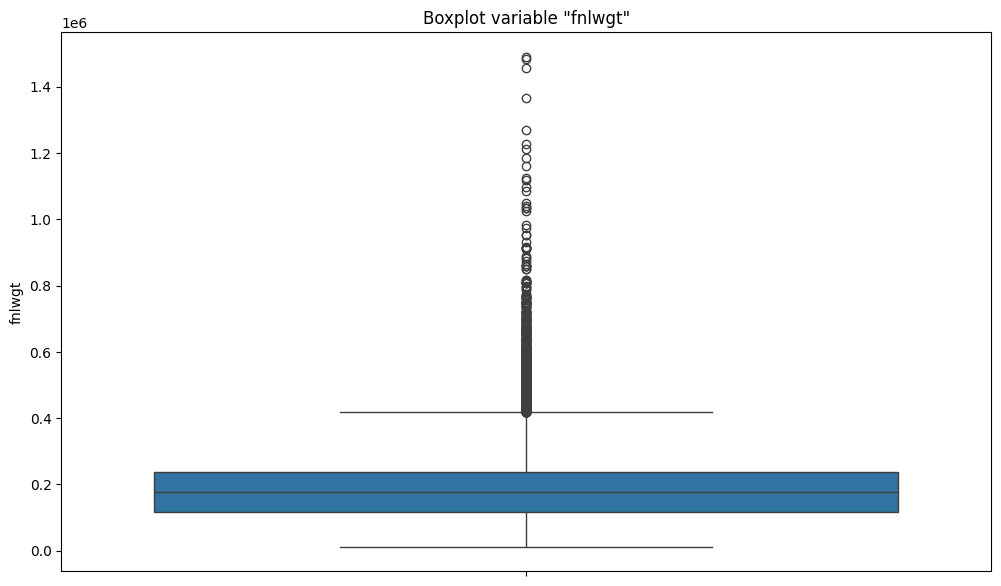

##################################################
ESTADISTICAS DEL BOXPLOT


Media: 189664.1
Mediana: 178144.5
Desviacion tipica: 105604.0

Primer cuartil: 117550.5
Segundo cuartil: 178144.5
Tercer cuartil: 237642.0
Cuarto cuartil: 1490400.0

Minimo registrado: 12285.0
Maximo registrado: 1490400.0

##################################################


In [10]:
plt.figure(figsize = (12, 7))
sns.boxplot(adult_df['fnlwgt'])

plt.title('Boxplot variable "fnlwgt"')
plt.savefig(os.path.join(IMAGE_PATH, 'boxplots/fnlwgt_boxplot.png'))
plt.show()

print("#"*50)
print('ESTADISTICAS DEL BOXPLOT')
print()
print()
print('Media:', round(adult_df['fnlwgt'].mean(), 1))
print('Mediana:', round(adult_df['fnlwgt'].median(), 1))
print('Desviacion tipica:', round(adult_df['fnlwgt'].std(), 1))
print()
print('Primer cuartil:', adult_df['fnlwgt'].quantile(0.25))
print('Segundo cuartil:', adult_df['fnlwgt'].quantile(0.50))
print('Tercer cuartil:', adult_df['fnlwgt'].quantile(0.75))
print('Cuarto cuartil:', adult_df['fnlwgt'].quantile(1.))
print()
print('Minimo registrado:', adult_df['fnlwgt'].min())
print('Maximo registrado:', adult_df['fnlwgt'].max())
print()
print("#"*50)

### Boxplot variable 'education-num'

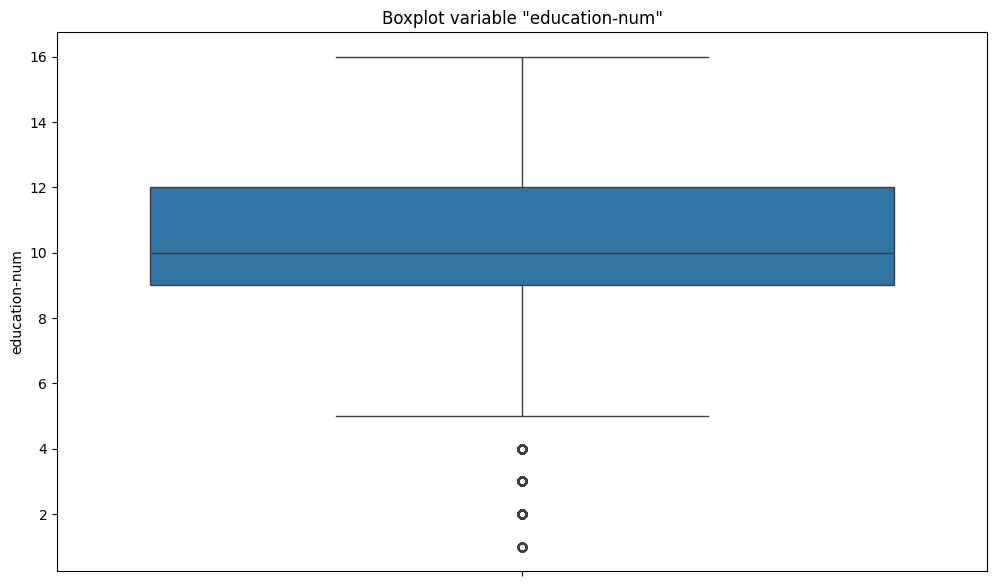

##################################################
ESTADISTICAS DEL BOXPLOT


Media: 10.1
Mediana: 10.0
Desviacion tipica: 2.6

Primer cuartil: 9.0
Segundo cuartil: 10.0
Tercer cuartil: 12.0
Cuarto cuartil: 16.0

Minimo registrado: 1
Maximo registrado: 16

##################################################


In [11]:
plt.figure(figsize = (12, 7))
sns.boxplot(adult_df['education-num'])

plt.title('Boxplot variable "education-num"')
plt.savefig(os.path.join(IMAGE_PATH, 'boxplots/education_num_boxplot.png'))
plt.show()

print("#"*50)
print('ESTADISTICAS DEL BOXPLOT')
print()
print()
print('Media:', round(adult_df['education-num'].mean(), 1))
print('Mediana:', round(adult_df['education-num'].median(), 1))
print('Desviacion tipica:', round(adult_df['education-num'].std(), 1))
print()
print('Primer cuartil:', adult_df['education-num'].quantile(0.25))
print('Segundo cuartil:', adult_df['education-num'].quantile(0.50))
print('Tercer cuartil:', adult_df['education-num'].quantile(0.75))
print('Cuarto cuartil:', adult_df['education-num'].quantile(1.))
print()
print('Minimo registrado:', adult_df['education-num'].min())
print('Maximo registrado:', adult_df['education-num'].max())
print()
print("#"*50)

### Boxplot variable 'capital-gain'

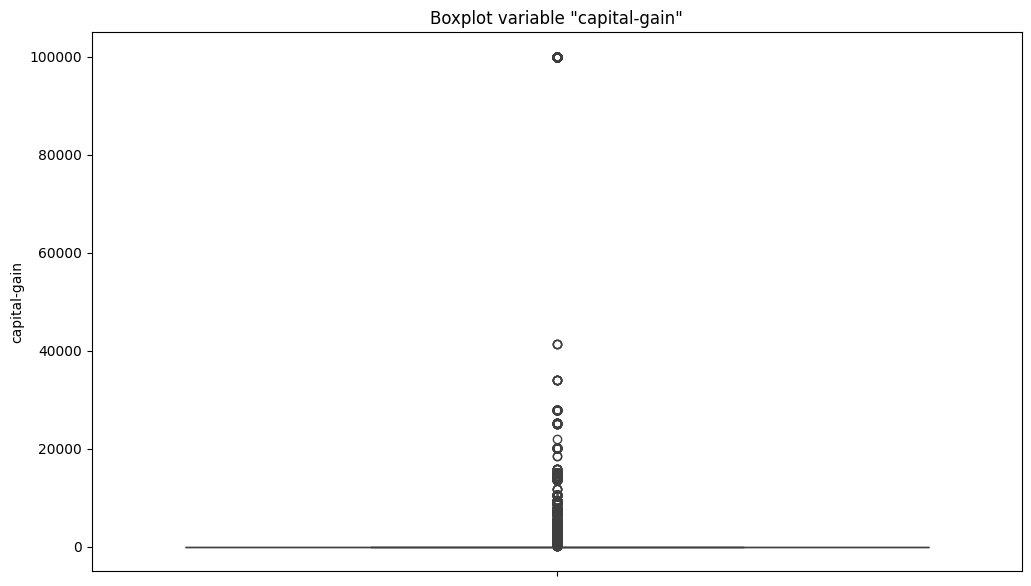

##################################################
ESTADISTICAS DEL BOXPLOT


Media: 1079.1
Mediana: 0.0
Desviacion tipica: 7452.0

Primer cuartil: 0.0
Segundo cuartil: 0.0
Tercer cuartil: 0.0
Cuarto cuartil: 99999.0

Minimo registrado: 0.0
Maximo registrado: 99999.0

##################################################


In [12]:
plt.figure(figsize = (12, 7))
sns.boxplot(adult_df['capital-gain'])

plt.title('Boxplot variable "capital-gain"')
plt.savefig(os.path.join(IMAGE_PATH, 'boxplots/capital_gain_boxplot.png'))
plt.show()

print("#"*50)
print('ESTADISTICAS DEL BOXPLOT')
print()
print()
print('Media:', round(adult_df['capital-gain'].mean(), 1))
print('Mediana:', round(adult_df['capital-gain'].median(), 1))
print('Desviacion tipica:', round(adult_df['capital-gain'].std(), 1))
print()
print('Primer cuartil:', adult_df['capital-gain'].quantile(0.25))
print('Segundo cuartil:', adult_df['capital-gain'].quantile(0.50))
print('Tercer cuartil:', adult_df['capital-gain'].quantile(0.75))
print('Cuarto cuartil:', adult_df['capital-gain'].quantile(1.))
print()
print('Minimo registrado:', adult_df['capital-gain'].min())
print('Maximo registrado:', adult_df['capital-gain'].max())
print()
print("#"*50)

### Boxplot variable 'capital-loss'

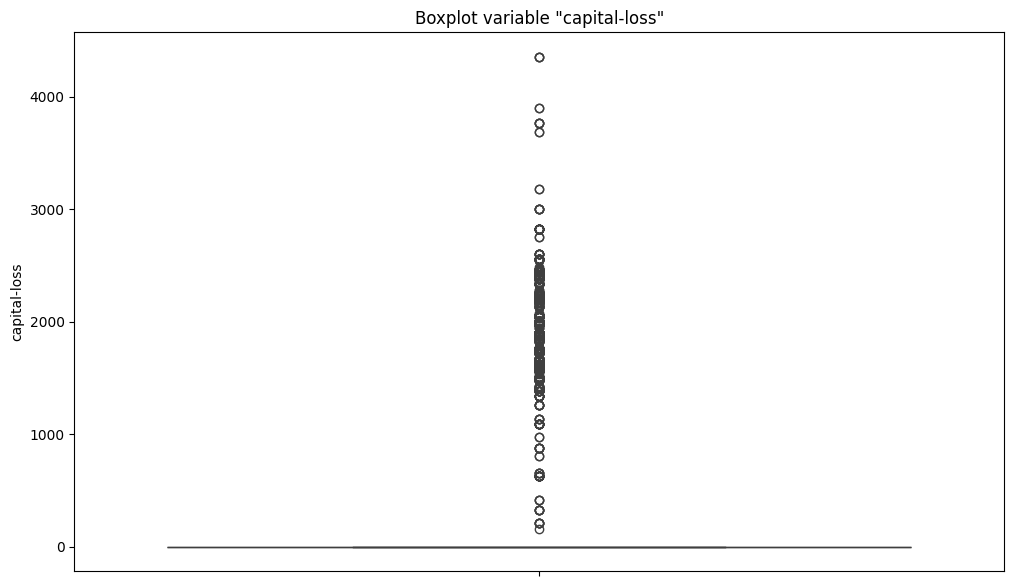

##################################################
ESTADISTICAS DEL BOXPLOT


Media: 87.5
Mediana: 0.0
Desviacion tipica: 403.0

Primer cuartil: 0.0
Segundo cuartil: 0.0
Tercer cuartil: 0.0
Cuarto cuartil: 4356.0

Minimo registrado: 0.0
Maximo registrado: 4356.0

##################################################


In [13]:
plt.figure(figsize = (12, 7))
sns.boxplot(adult_df['capital-loss'])

plt.title('Boxplot variable "capital-loss"')
plt.savefig(os.path.join(IMAGE_PATH, 'boxplots/capital_loss_boxplot.png'))
plt.show()

print("#"*50)
print('ESTADISTICAS DEL BOXPLOT')
print()
print()
print('Media:', round(adult_df['capital-loss'].mean(), 1))
print('Mediana:', round(adult_df['capital-loss'].median(), 1))
print('Desviacion tipica:', round(adult_df['capital-loss'].std(), 1))
print()
print('Primer cuartil:', adult_df['capital-loss'].quantile(0.25))
print('Segundo cuartil:', adult_df['capital-loss'].quantile(0.50))
print('Tercer cuartil:', adult_df['capital-loss'].quantile(0.75))
print('Cuarto cuartil:', adult_df['capital-loss'].quantile(1.))
print()
print('Minimo registrado:', adult_df['capital-loss'].min())
print('Maximo registrado:', adult_df['capital-loss'].max())
print()
print("#"*50)

### Boxplot variable 'hours-per-week'

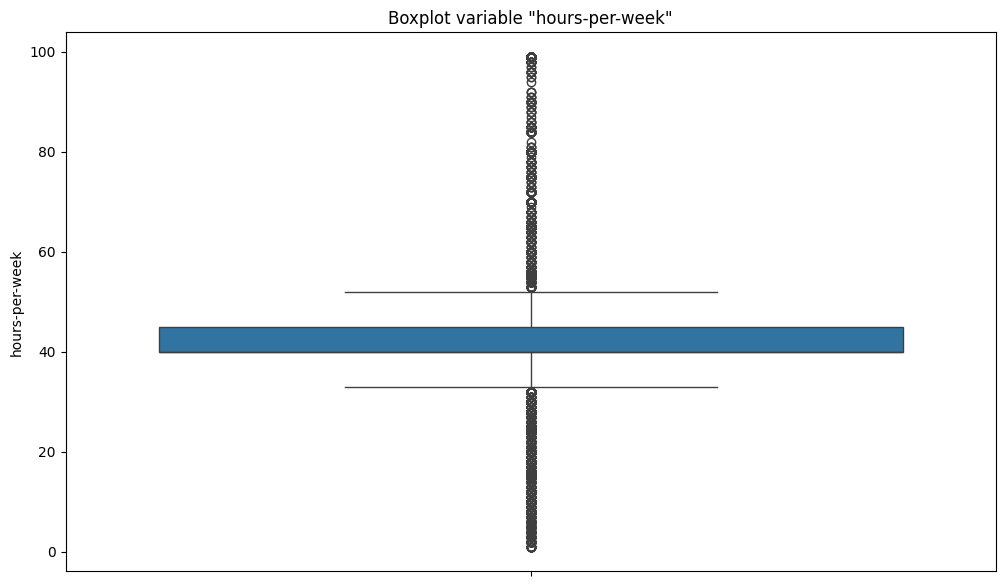

##################################################
ESTADISTICAS DEL BOXPLOT


Media: 40.4
Mediana: 40.0
Desviacion tipica: 12.4

Primer cuartil: 40.0
Segundo cuartil: 40.0
Tercer cuartil: 45.0
Cuarto cuartil: 99.0

Minimo registrado: 1
Maximo registrado: 99

##################################################


In [14]:
fig = px.box(adult_df['hours-per-week'])


plt.figure(figsize = (12, 7))
sns.boxplot(adult_df['hours-per-week'])

plt.title('Boxplot variable "hours-per-week"')
plt.savefig(os.path.join(IMAGE_PATH, 'boxplots/hours_per_week_boxplot.png'))
plt.show()

print("#"*50)
print('ESTADISTICAS DEL BOXPLOT')
print()
print()
print('Media:', round(adult_df['hours-per-week'].mean(), 1))
print('Mediana:', round(adult_df['hours-per-week'].median(), 1))
print('Desviacion tipica:', round(adult_df['hours-per-week'].std(), 1))
print()
print('Primer cuartil:', adult_df['hours-per-week'].quantile(0.25))
print('Segundo cuartil:', adult_df['hours-per-week'].quantile(0.50))
print('Tercer cuartil:', adult_df['hours-per-week'].quantile(0.75))
print('Cuarto cuartil:', adult_df['hours-per-week'].quantile(1.))
print()
print('Minimo registrado:', adult_df['hours-per-week'].min())
print('Maximo registrado:', adult_df['hours-per-week'].max())
print()
print("#"*50)

Principalmente, los Boxplots representados son, en esencia, para mostrar de manera visual el contenido incluido en el dataframe generado por el metodo '.describe()'.

Podemos ver como estos valores corresponden a los marcados en cada uno de los cuartiles. Por otra parte, si revisamos el registro de valores maximos y minimos, podemos ver, gracias a estas graficas, que muchos de estos valores son considerados outliers, o datos que no estan dentro de la distribucion promedio de los valores registrados.

# Correlacion

La correlacion es una medida que indica la intensidad de la relacion lineal existente entre dos variables. Esta recibe un valor comprendido entre [-1, 1]. A continuacion, se muestra una breve explicacion de lo que representa cada uno de los valores posibles de correlacion para una variable:

* -1 . Dos variables tienen relacion lineal, pero esta es inversa entre ellas. Esto quiere decir que si una variable aumenta, la otra disminuye. Si el coeficiente de correlacion entre dos variables adquiere el valor de -1, se dice que se trata de una anticorrelacion perfecta, y se espera que el valor de una variable disminuya en tanto que aumenta el valor de la otra, y viceversa.

* 0 . Dos variables no mantiene relacion lineal. OJO: esto no significa que no esten relacionadas, ya que pueden mantener relaciones de otros tipos (polinomicas, logaritmicas, ...)

* +1 . Dos variables tienen relacion lineal. Esto quiere decir que si una variable aumenta, la otra tambien lo hace. Si el coeficiente de correlacion entre dos variables adquiere el valor de +1, se dice que se trata de una correlacion perfecta, y se espera que el valor de una variable aumente en tanto que aumenta el valor de la otra.

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076628       0.030940      0.077229      0.056944   
fnlwgt         -0.076628  1.000000      -0.038761     -0.003706     -0.004366   
education-num   0.030940 -0.038761       1.000000      0.125146      0.080972   
capital-gain    0.077229 -0.003706       0.125146      1.000000     -0.031441   
capital-loss    0.056944 -0.004366       0.080972     -0.031441      1.000000   
hours-per-week  0.071558 -0.013519       0.143689      0.082157      0.054467   
class          -0.230369  0.006339      -0.332613     -0.223013     -0.147554   

                hours-per-week     class  
age                   0.071558 -0.230369  
fnlwgt               -0.013519  0.006339  
education-num         0.143689 -0.332613  
capital-gain          0.082157 -0.223013  
capital-loss          0.054467 -0.147554  
hours-per-week        1.000000 -0.227687  
class                -0.227687  1.000000  


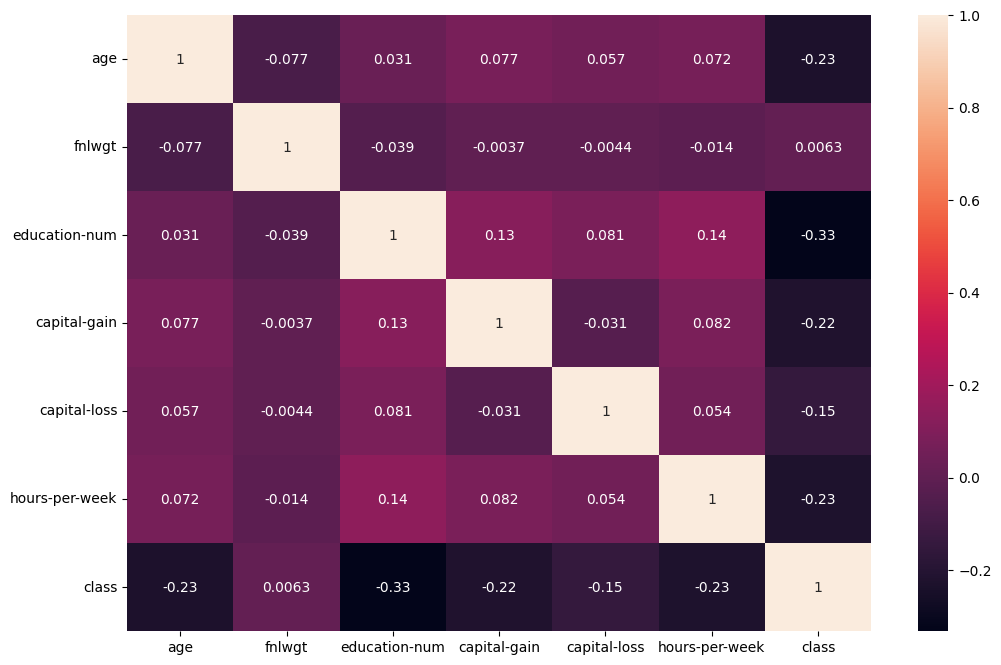

In [15]:
# Instancio una copia del dataframe para esta celda
adult_df_copy = adult_df.copy()

# Defino la lista de variables numericas del dataset
num_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'class']

# La variable objetivo es categorica nominal y necesita un procedimiento especial para ser utilizada por Seaborn
adult_df_copy['class'] = adult_df_copy['class'].apply(lambda x: 0 if x == ">50K" else 1)

matrix_corr = adult_df_copy[num_vars].corr()
print(matrix_corr)

# Mapa de calor con los coeficientes de correlacion entre las variables numericas
plt.figure(figsize = (12, 8))
sns.heatmap(matrix_corr, annot = True)
plt.savefig(os.path.join(IMAGE_PATH, 'pearson_corr/pearson_corr_coefs.png'))
plt.show()

* **Edad (age)**: La correlación entre "age" y "class" es -0.230369, indicando que a medida que aumenta la edad, hay una tendencia a cambiar de clase, sugiriendo que la edad puede influir en la posición económica o laboral de una persona.

* **Peso final (fnlwgt)**: La correlación de "fnlwgt" con "class" es 0.006339, lo que sugiere que hay una relación casi nula o insignificante entre el peso final de una observación y su clasificación en la variable objetivo. Esto tiene mucho sentido, ya que realmente esta variable no indica una caracteristica propia de una determinada observacion, sino que su valor sugiere una estimacion del numero de personas a las que representa dicha instancia.

* **Número de años de educación (education-num)**: Existe una correlación negativa de -0.332613 entre "education-num" y "class", lo que indica que a mayor educación, existe una tendencia a estar en una clase diferente, resaltando la importancia de la educación en la clasificación socioeconómica.

* **Ganancia de capital (capital-gain)**: La correlación de -0.223013 entre "capital-gain" y "class" sugiere que las personas con mayores ganancias de capital tienden a clasificarse de manera diferente en la variable objetivo, lo que podría indicar una mejor posición económica.

* **Pérdida de capital (capital-loss)**: Con una correlación de -0.147554, la pérdida de capital tiene una relación negativa moderada con "class", lo que puede implicar que experiencias económicas negativas influyen ligeramente en la clasificación de la variable objetivo.

* **Horas por semana (hours-per-week)**: La correlación de -0.227687 muestra que a más horas trabajadas por semana, existe una tendencia a estar en una clase diferente, sugiriendo que el tiempo de trabajo tiene un impacto en la clasificación socioeconómica.

# Visualizacion de datos

En esta seccion del notebook, tratare de aportar una vision mas especifica del dataset, generando diversos graficos en los que poder representar las distribuciones de las diferentes variables del conjunto de datos, tratando de buscar algun insight que pueda ser valioso para nuestro objetivo final de modelizacion.

<Figure size 640x480 with 0 Axes>

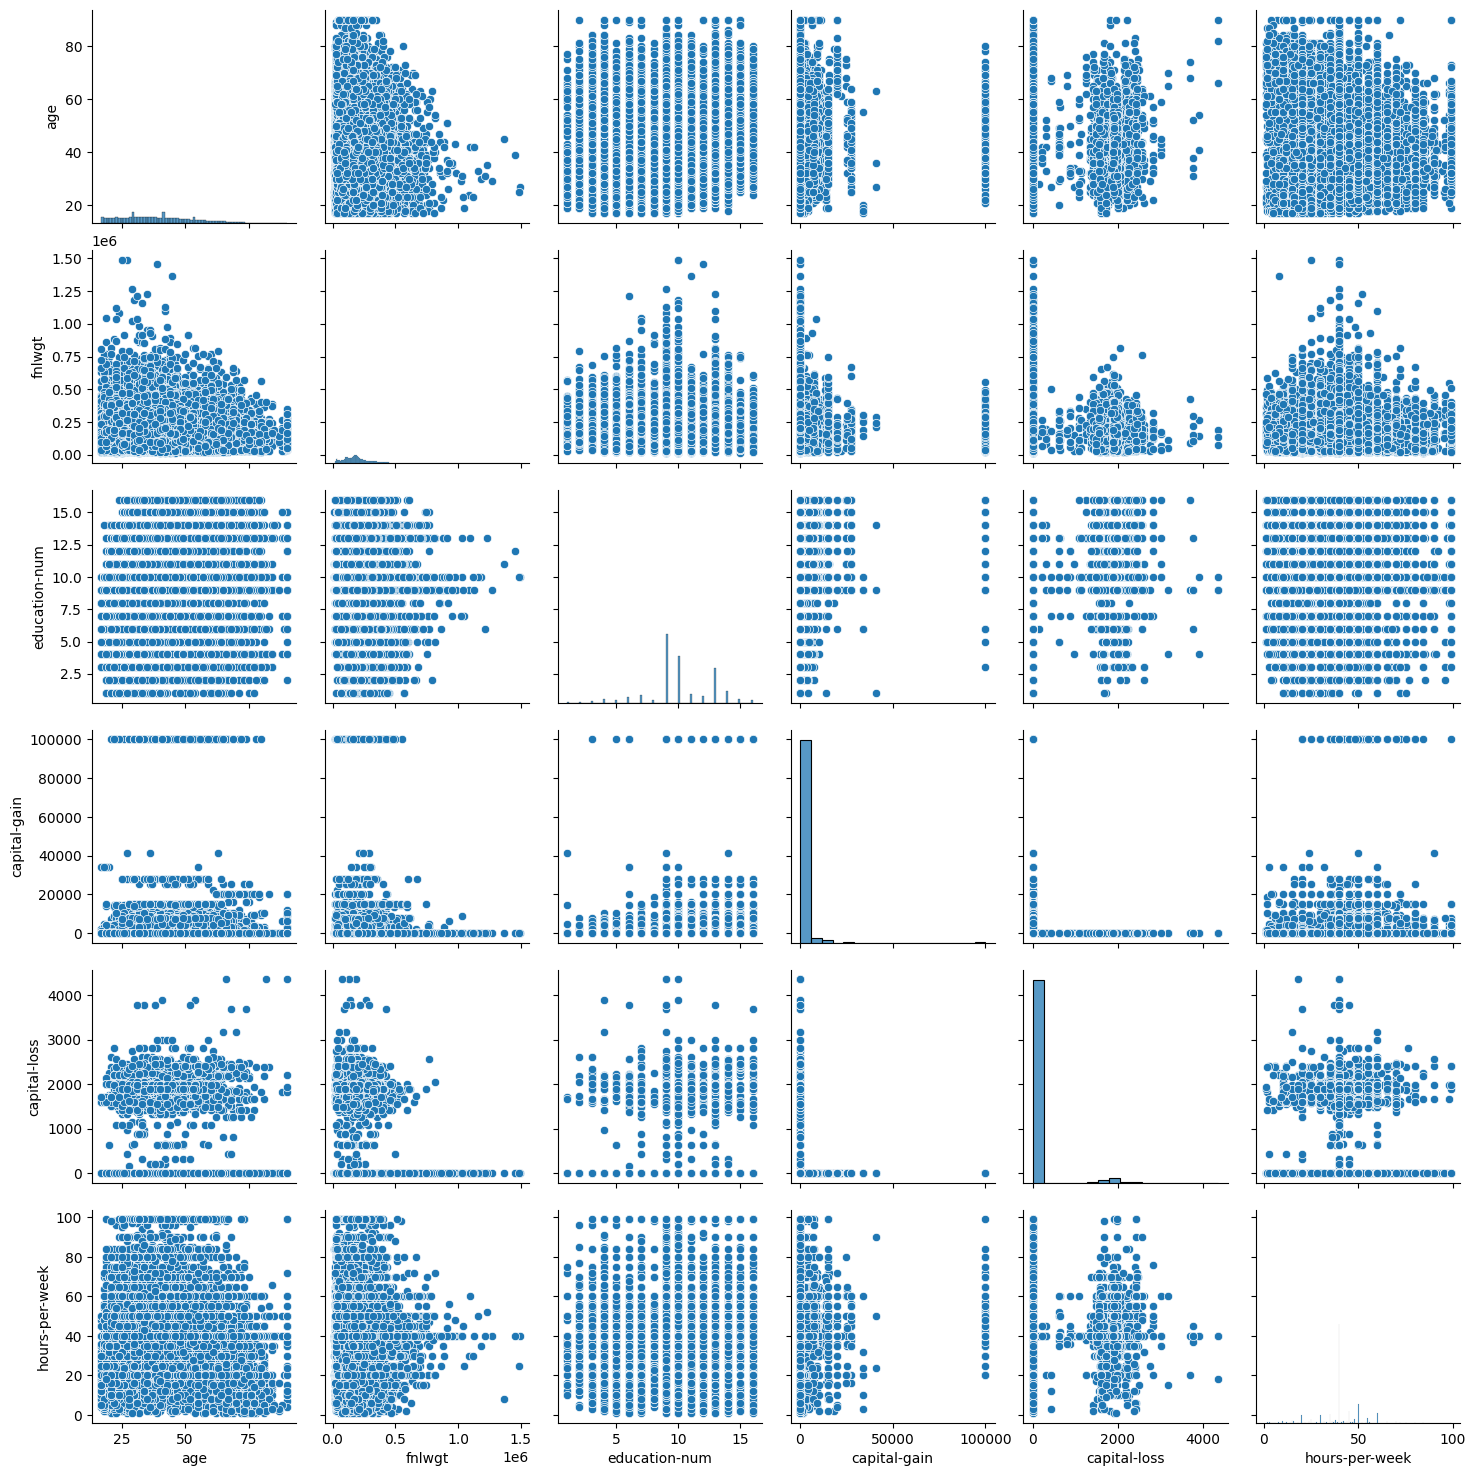

In [16]:
plt.figure()
sns.pairplot(adult_df)
plt.savefig(os.path.join(IMAGE_PATH, 'pairplots/general_pairplot.png'))
plt.show()

<Figure size 640x480 with 0 Axes>

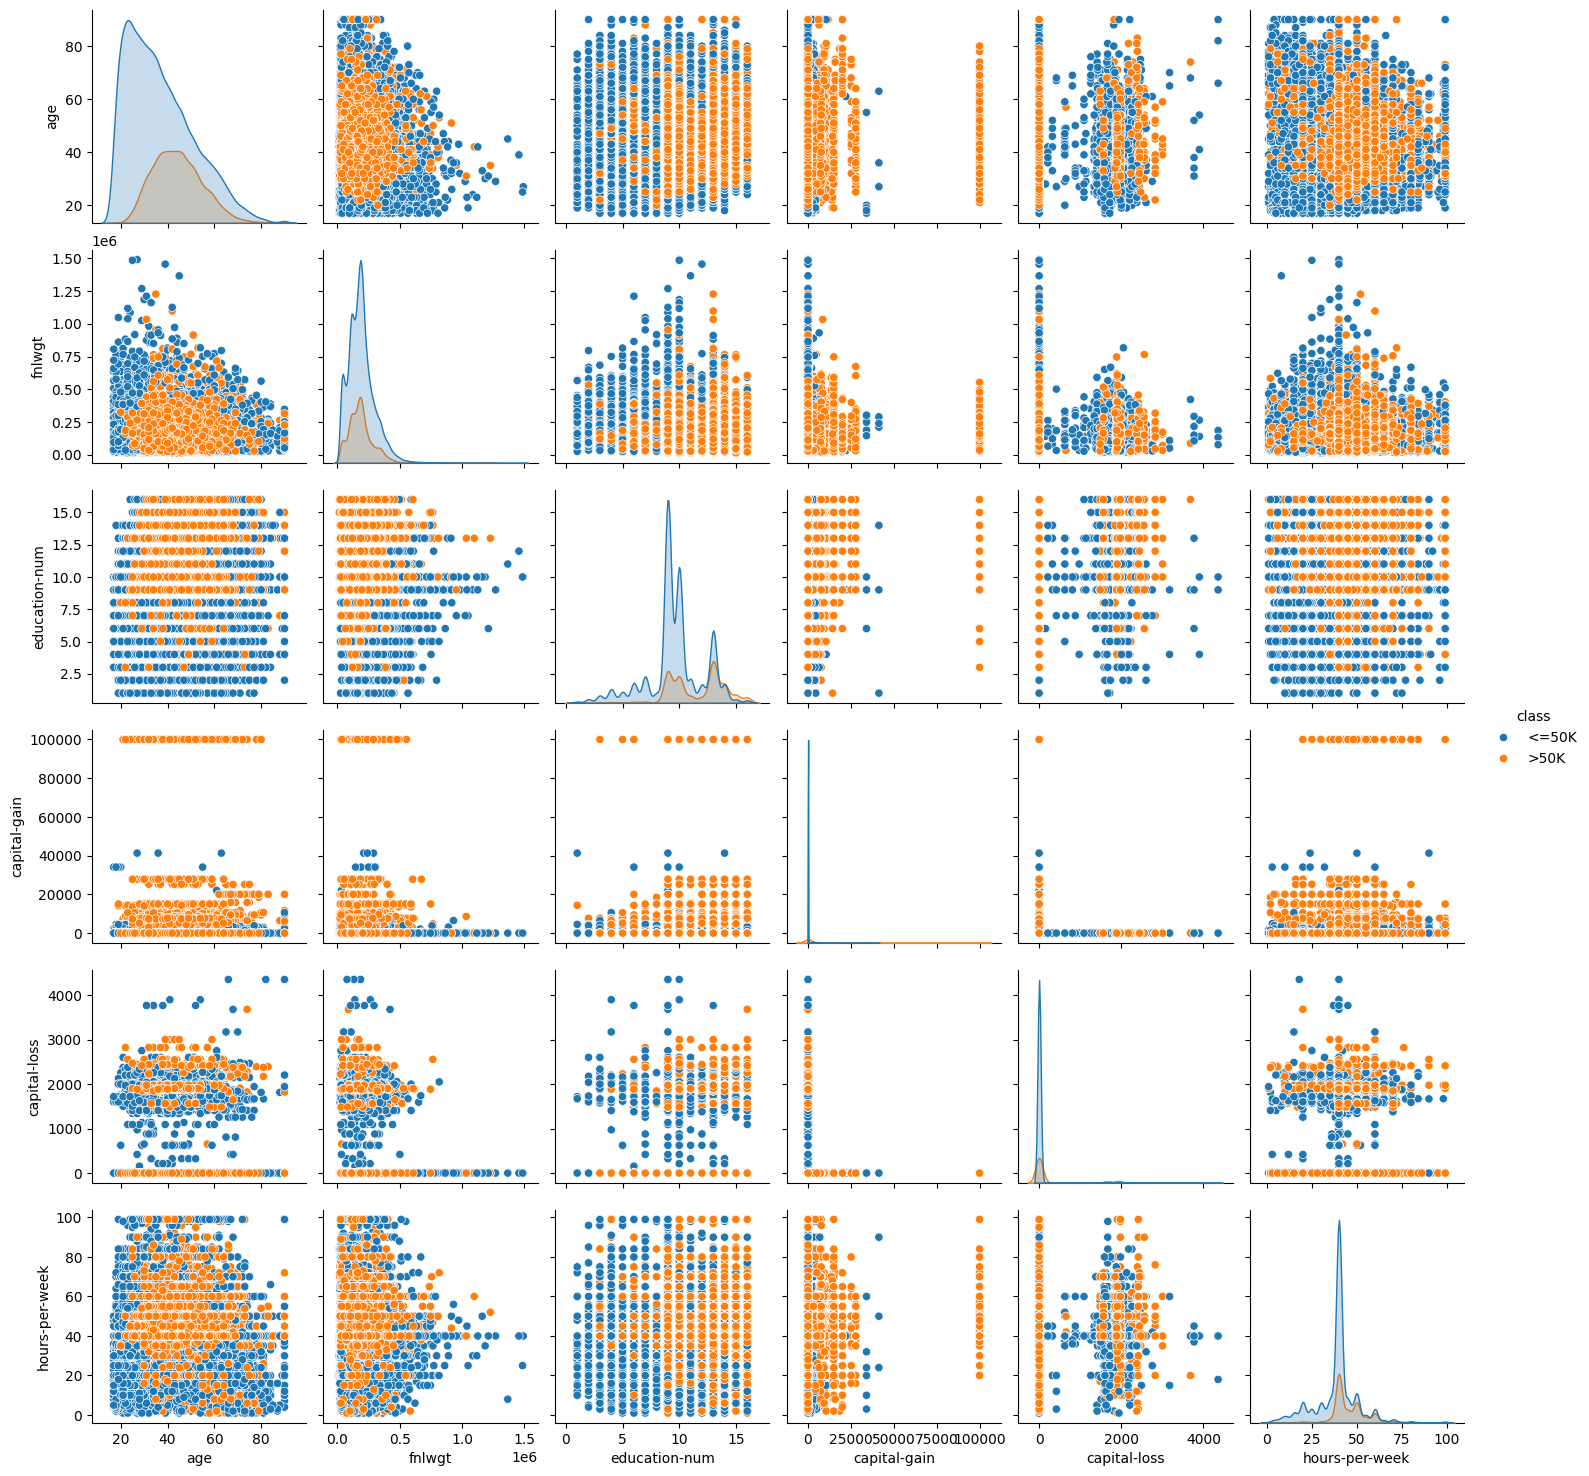

In [17]:
plt.figure()
sns.pairplot(adult_df, hue = 'class')
plt.savefig(os.path.join(IMAGE_PATH, 'pairplots/class_hue_pairplot.png'))
plt.show()

El metodo *.pairplot()* de Seaborn es muy util para generar rapidamente graficos de dispersion con los registros de las diferentes variables de nuestro dataset. De nuevo, se trata de un metodo que tiene en cuenta unicamente las variables numericas, que son las que podemos utilizar para generar graficos.

*.pairplot()* permite enfrentar diferentes las variables que escojamos de un conjunto de datos, con otras diferentes del mismo dataset. Para los casos en las que he utilizado este metodo, muestro comparo cada variable numerico con el resto de variables numericas, y consigo misma.

En este caso, he generado dos diferentes "graficos", que incluyen varios subgraficos:

* En el **primer grafico**, no he aplicado ningun matiz para diferenciar registros en base a alguna caracteristica registrada. He generado los graficos, de manera normal, representando todos los datos de las variables numericas. Si observamos la diagonal de graficos, vemos que estos corresponden a graficos de barras, que se generan cuando una caracteristica es comparada consigo misma (en ese caso, el grafico de barras permite visualizar las distribuciones de los diferentes valores registrados en una variable. En caso de estar 'bucketizados', se logra una visualizacion mas clara).

* En el **segundo grafico**, he aplicado un matiz especifico con el parametro "hue". Este matiz me ha permitido generar nuevos graficos, en los que se distingo cada uno de los valores en funcion de la clase de la variable objetivo a la que pertenecen. Esto es muy util, pues permite comprender de una manera mas clara como se distribuyen los ejemplos, en funcion de el ninvel de ganancia economica anual de cada uno.



#### Analizando los graficos con matiz por variable objetivo

Como vemos, el metodo .pairplot() es muy potente, sobre todo en casos en los que nuestro conjunto de datos no cuenta con demasiadas caracteristicas, que aunque no impedirian la visualizacion, sobrecargarian el notebook de graficos, y el tiempo de generacion aumentaria.

El segundo grafico generado, permite descubrir algunas tendencias implicitas en el dataset, las cuales menciono a continuacion (en el borde derecho del grafico podemos ver la leyenda de colores para ambas clases):

* El enfrentamiento entre las columnas '**age**' nos indica como existe una amplia diferencia de ganancias anuales entre las personas, una vez se ha superado la barrera de =-40 anios. Parece ser que, en promedio, el rango salarial de una persona tiende a aumentar hasta que alcanza cerca de los 40 anios de edad. El dataset no registra valores continuos para la variable objetivo, por lo que no podemos lanzar una estimacion aproximada. No obstante, la cifra de ganancias economicas anuales podria ser relativamente mayor a $50K.

* Columna '**fnlwgt**' (Final Weight). Esta columna almacena un valor continuo, el cual representa, en ultima instancia, una estimacion numerica del numero probable de personas, al que un determinado registro representa. El enfrentamiento entre las columnas 'fnlwgt' nos muestra como la clase de personas que tienen unos ingresos anuales iguales o inferiores a 50K (<=50K), representa a un rango de personas mucho mayor que la clase mas pudiente. De hecho, la sombra para la clase menos pudiente adquiere una forma (cercana) de campana de Gauss, indicando como, para la mayoria de casos, cada observacion representa a cerca de 1.5 millones de personas, lo cual supone una diferencia bastante superior en comparacion con la otra clase de la variable objetivo. Por otro lado, la sombra para la clase mas adinerada sigue tambien una distribucion que podriamos considerar normal, pero en este caso, en promedio, la estimacion para este grupo representa a en torno 2 veces menos de personas que la clase contraria.

* El enfrentamiento entre las columnas '**education-num**' muestra como el conjunto de observaciones que se situan en una ganancia economica anual <=50K, sigue una distribucion normal. Es cierto que existen casos en los que estas observaciones pueden registrar un numero mayor o menor para esta variable (indicativo del nivel academico), pero en promedio, la clase menor adinerada registra un valor perteneciente al rango (8, 10).  Es interesante poder ver como, para el caso de observaciones que pertenecen al grupo mas adinerado, la distribucion de ejemplos comienza en un valor mas alto para esta variable, indicando como no se suelen ver casos de personas adineradas con un bajo nivel academico.

* El enfrentamiento de columnas '**capital-gain**' muestra como, en el caso de personas que pertenen a la clase >50K, parte de sus ingresos proviene de fuentes de inversion, ajenas a su trabajo regular. En el caso de la clase contraria, tambien es cierto que existen bastante casos de observaciones cuyos ingresos provienen en parte de otras fuentes de inversion, pero las cifras en este caso no alcanzan las registradas para la clase mas pudiente.

* El enfrentamiento de columnas '**capital-loss**' muestra como existe una tendencia elevada a perder dinero en fuentes de inversion ajenas al trabajo regular, cuando se trata de personas que pertenecen al grupo de <=50K. Es cierto que tambien se registran perdidas para la otra clase, pero no es un numero tan elevado de estas (habria que tener en cuenta que el numero de observaciones de la clase <=50K es mucho mayor). Esto podria deberse, tal vez, a la caracteristica de esta clase de tener un menor nivel academico, que podria mostrar un patron de ejecucion en el ambito de las inversiones, que no seria tan estudiado como ocurre con la otra clase. Esto podria explicar la gran diferencia que existe entre ambas clases, en cuanto a la perdida economica que existe en relacion a las fuentes de inversion ajenas al trabajo regular.

* El enfrentamiento de columnas '**hours-per-week**' muestra una distribucion normal para la sombra de observaciones pertenecientes a la clase <=50K, habiendo mas tendencia de esta clase a ejercer un numero de horas laborales comprendidas entre las 35 y las 45 horas a la semana. Si observamos la sombra de observaciones que pertenecen a la clase contraria, vemos que se mantiene el patron de horas de trabajo promedio semanales que la clase <=50K, lo cual puede ser indicativo de que un mayor numero de horas trabajadas, no corresponde a un mayor nivel economico; o mejor dicho: la diferencia economica entre clases no es asumida por las horas de trabajo semanales de las personas. No obstante, si observamos las sombras de ambas clases, vemos como para ambas categorias existen observaciones que registran un numero de horas semanales mucho mayores, alcanzando cifras de hasta 100 horas a la semana. Al no contener nuestra variable objetivo valores continuos, no podemos estimar la ganancia neta de las observaciones. No obstante, al menos para el grupo de personas mas pudiente, es probable que aquellas que trabajan este numero elevado de horas, sean aquellas que mas ingresos perciben a lo largo del anio.

# Visualizacion de distribuciones

In [18]:
# Me interesa poder visualizar la distribucion de observacion de personas de las razas y generos registrados.
race_df = pd.get_dummies(adult_df['race']).astype(int)
dict_race = {}

for column in race_df.columns:
    column_df = sum([race_df[race_df[column] == 1.]])
    dict_race[column] = len(column_df)

print('Conteo de observaciones:')
for key, value in dict_race.items():
    print(key, '==>', value)

Conteo de observaciones:
Amer-Indian-Eskimo ==> 470
Asian-Pac-Islander ==> 1519
Black ==> 4685
Other ==> 406
White ==> 41762


In [19]:
sex_df = pd.get_dummies(adult_df['sex']).astype(int)
dict_sex = {}

for column in sex_df.columns:
    column_df = sum([sex_df[sex_df[column] == 1.]])
    dict_sex[column] = len(column_df)

print('Conteo de observaciones:')
for key, value in dict_sex.items():
    print(key, '==>', value)

Conteo de observaciones:
Female ==> 16192
Male ==> 32650


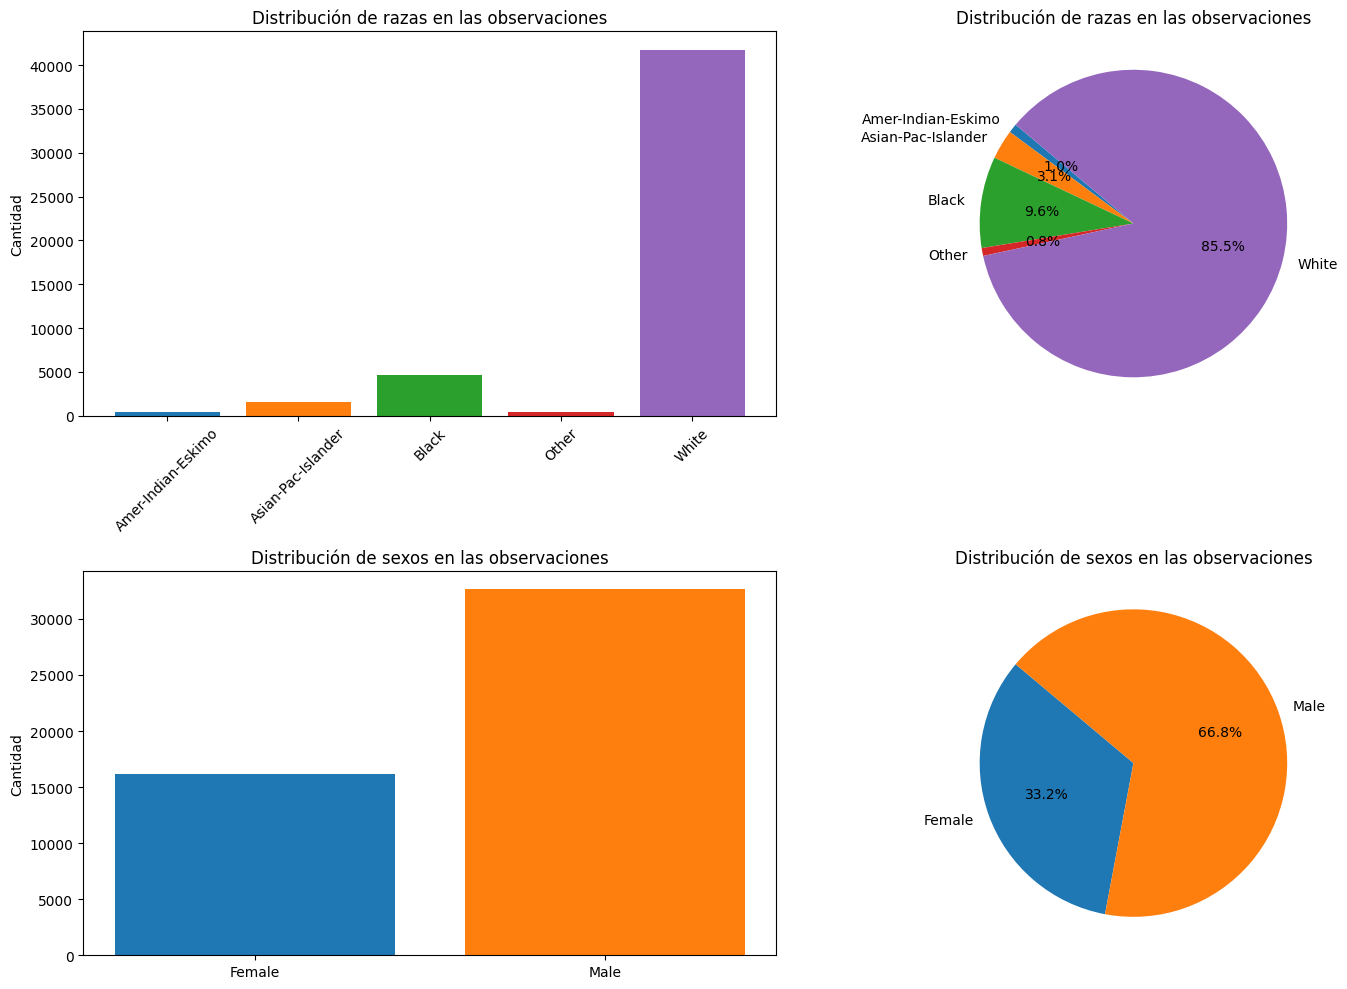

In [20]:
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico de barras para la distribución de razas
axs[0, 0].bar(dict_race.keys(), dict_race.values(), color=colores[:len(dict_race.keys())])
axs[0, 0].set_title('Distribución de razas en las observaciones')
axs[0, 0].set_ylabel('Cantidad')  # Agrego etiqueta al eje y para mayor claridad
axs[0, 0].tick_params(axis='x', rotation=45)  # Roto las etiquetas del eje x para mejorar legibilidad

# Gráfico de pastel para la distribución de razas
axs[0, 1].pie(dict_race.values(), labels=dict_race.keys(), colors=colores[:len(dict_race.keys())], autopct='%1.1f%%', startangle=140)
axs[0, 1].set_title('Distribución de razas en las observaciones')

# Gráfico de barras para la distribución de sexos
axs[1, 0].bar(dict_sex.keys(), dict_sex.values(), color=colores[:len(dict_sex.keys())])
axs[1, 0].set_title('Distribución de sexos en las observaciones')
axs[1, 0].set_ylabel('Cantidad')  # Agrego etiqueta al eje y para mayor claridad

# Gráfico de Pie para la distribución de sexos
axs[1, 1].pie(dict_sex.values(), labels=dict_sex.keys(), colors=colores[:len(dict_sex.keys())], autopct='%1.1f%%', startangle=140)
axs[1, 1].set_title('Distribución de sexos en las observaciones')

plt.tight_layout()
plt.savefig(os.path.join(IMAGE_PATH, 'distrib/race_sex_distributions.png'))
plt.show()

Los graficos de la celda anterior permiten aproximarnos a la hipotesis que se planteo en el documento adjunto con el proyecto. En esta hipotesis, daba por hecho que, en promedio, las observaciones que pertenecen a la clase mas adinerada, serian en su mayoria hombres blancos. 

Por el momento, podemos ver como estos atributos son mayoritarios para las variables de raza y sexo, lo cual hace mas probable aun que dicho hipotesis este en lo cierto.

# Respuesta a las hipotesis planteadas

Una vez hemos analizado el conjunto de datos, podemos llegar a lanzar una respuesta provisional para las hipotesis planteadas en la Documentacion del proyecto.

* ***Lo más común sería esperar que, de media, las personas de mayor edad, tienden a poder tener una ganancia neta economica anual superior al resto.*** Finalmente, podemos ver como esta hipotesis no estaba en lo cierto. La distribucion de datos nos indica como son las observaciones de personas cuya edad se situa entre 35-50 anios las que registran los valores de ganancias anuales mas alto, mientras que para las personas de mayor edad, la proporcion de aquellas que pertenece a la clase mas adinerada es una minoria.

* ***Es razonable pensar que las personas educadas tienden a recibir mejores ingresos que aquellas personas que no han recibido una buena educación.*** Esta hipotesis estaba en lo correcto, pues gran parte de las observaciones de personas con un valor mas alto para la variable indicativo del nivel educativo de la persona se encuentran dentro del grupo de personas mas adineradas. No obstante, tambien se registrar observaciones de personas con los mismos valores para esta variable, que se encuentran dentro de la clase menos pudiente.

* ***Relacion entre la raza y el genero de las personas***. En el documento proporcionado junto con el proyecto, se indico como se esperaba que, en promedio, las observaciones de personas que pertenecen al grupo mas adinerado, fuesen hombres blancos.

## Guardo el dataset en el directorio local

Si bien es cierto que OpenML no pone restricciones al momento de acceder a los datasets publicados, y que, al tratarse de un conjunto de datos bastante conocido, podriamos obtenerlo desde otros medios, lo cierto es que no hay problema en guardar el dataset en local

Esta practica, siempre y cuando estemos aprobados a realizarla, nos garantiza nuestro futuro acceso a los datos con los que ha sido entrenado el modelo inicial, lo que podria facilitar posibles futuros fine-tunings.

In [21]:
raw_dataset__route = '../data/raw/'
adult_df.to_csv(os.path.join(raw_dataset__route, 'census_income.csv'), index = False)

print('Conjunto de datos almacenado con exito.')

Conjunto de datos almacenado con exito.
